<img src="https://account.cin.ufpe.br/img/logo-horizontal.1c557418.png" width="300">

#### <span style="color:red">Disciplina: </span>IN1098 - 2025.2
#### <span style="color:red">Projeto: </span> Exemplos de Federated Learning e Differential Privacy
#### <span style="color:red">Subprojeto: </span>Differential Privacy com Opacus
#### <span style="color:red">Alunos: </span>
- **Roberto De Medeiros**
- **Arthur Fernandes**

---

## Introdução ao Differential Privacy com Opacus

### Differential Privacy
- O conceito de privacidade diferencial foi formalizado por Cynthia Dwork, Frank McSherry, Kobbi Nissim e Adam Smith em 2006.
- A motivação era resolver um problema clássico: como publicar estatísticas úteis de bases de dados (como censos ou registros médicos) sem comprometer a privacidade de indivíduos. Antes disso, métodos como anonimização simples (remover nomes, endereços) mostraram-se frágeis, pois era possível reidentificar pessoas cruzando informações com outras bases.
- O mecanismo funciona adicionando ruído estatístico (aleatoriedade controlada) às respostas de consultas em bancos de dados. Assim, o resultado de uma análise é praticamente o mesmo, independentemente de um indivíduo estar ou não presente nos dados. Isso garante que nenhuma pessoa possa ser identificada com confiança a partir das estatísticas publicadas.

<img src="https://www.nist.gov/sites/default/files/images/2021/07/08/DP%20Blog%20Figure%201.png" width="444">
Fig 1. Abordagens estáticas e dinâmicas para análise de programas para comprovação automática de Differential Privacy. Extraído do original em [4].

#### Justificativa / Vantagens
- Proteção contra reidentificação: Mesmo dados “anônimos” podem ser cruzados com outras fontes e revelar identidades.
- Garantia matemática: definição formal de privacidade baseada em probabilidade, que limita o quanto se pode aprender sobre um indivíduo.
- Equilíbrio entre utilidade e privacidade: extrair padrões coletivos sem expor detalhes pessoais.
- Exemplo: Imagine uma pesquisa sobre hábitos alimentares
- - Sem privacidade diferencial: se alguém descobre que você participou, pode inferir suas preferências.
- - Com privacidade diferencial: o sistema adiciona “ruído” às respostas, de modo que não se sabe se uma resposta específica veio de você ou de outra pessoa, mas ainda é possível ver tendências gerais (ex.: “70% preferem frutas no café da manhã”).

#### Casos de uso na prática
- Censo dos EUA (2020): O U.S. Census Bureau aplicou differential privacy para proteger dados demográficos divulgados publicamente. [5]
- Apple: Implementa differential privacy em iPhones para coletar estatísticas de uso (como emojis mais usados) sem comprometer a privacidade dos usuários. [6]
- Google: Utiliza differential privacy em ferramentas como Chrome e em pesquisas agregadas para melhorar produtos sem expor dados individuais. [7]
- Saúde: Hospitais podem compartilhar estatísticas sobre doenças sem revelar informações sensíveis de pacientes. [8]

### Opacus
- Implementa DP-SGD: a versão do SGD que aplica clipping e ruído gaussiano aos gradientes.
- Funciona de forma muito rápida, usando "gradientes por amostra" altamente otimizados.
- Adaptada para treino deep learning real, não apenas exemplos simples.
- Mantém acompanhamento automático de ε (epsilon) via privacy accountant.
- Fácil de integrar a vezes com modelos PyTorch já existentes (CNNs, transformers etc).

#### Algoritmo:
1. Calcula o gradiente por amostra (ou micro-batch).
1. Aplica clipping L2 em cada gradiente.
1. Soma tudo e adiciona ruído gaussiano calibrado.
1. O privacy accountant acumula o consumo de privacidade.

---
## Referências
- [1] Dwork, C.; McSherry, F.; Nissim, K.; Smith, A. Calibrating Noise to Sensitivity in Private Data Analysis. In: Proceedings of the 3rd Theory of Cryptography Conference (TCC 2006), Lecture Notes in Computer Science, vol. 3876, pp. 265–284. Springer. 2006.
- [2] Dwork, C. & Roth, A. The Algorithmic Foundations of Differential Privacy. Foundations and Trends in Theoretical Computer Science, 9(3–4), 211–407. 2014.
- [3] Alzoubi, Y. I. & Mishra, A. Differential privacy and artificial intelligence: potentials, challenges, and future avenues. EURASIP Journal on Information Security, 2025(18). 2025.
- [4] Abuah, Chike. Automatic Proofs of Differential Privacy.  Cybersecurity Insights a NIST blog. Publicado em 22 de julho de 2021. Disponível em https://www.nist.gov/blogs/cybersecurity-insights/automatic-proofs-differential-privacy. Acesso em 01 de dez de 2025.
- [5] Abowd, J. M. The U.S. Census Bureau Adopts Differential Privacy. Proceedings of the 24th ACM SIGKDD International Conference on Knowledge Discovery & Data Mining, pp. 2867–2867. 2018.
- [6] Apple. Differential Privacy Overview. Apple Machine Learning Journal, Vol. 1. 2017.
- [7] Erlingsson, Ú.; Pihur, V.; Korolova, A. RAPPOR: Randomized Aggregatable Privacy-Preserving Ordinal Response. Proceedings of the 2014 ACM SIGSAC Conference on Computer and Communications Security, pp. 1054–1067. 2014.
- [8] Dankar, F. K.; El Emam, K. The application of differential privacy to health data. Proceedings of the 2012 ACM Workshop on Privacy in the Electronic Society (WPES ’12), pp. 123–132. 2012.
- [9] Yousefpour, A; Shilov, I; Sablayrolles, A; Testuggine, D; Prasad, K; Malek, M; Nguyen, J; Ghosh, S; Bharadwaj, A; Zhao, J; Cormode, G; Mironov, I. “Opacus: User-Friendly Differential Privacy Library in PyTorch”. arXiv preprint arXiv:2109.12298. 2021.
- [10] Swapna. Convolutional Neural Network | Deep Learning. Developers Breach. Publicado em 21 de agosto de 2020. Disponível em https://developersbreach.com/convolution-neural-network-deep-learning/. Acesso em 08 de dez de 2025.
- [11] Chrislb. File:MultiLayerNeuralNetwork english.png. CC BY-SA 3.0 <http://creativecommons.org/licenses/by-sa/3.0/>, via Wikimedia Commons. Disponível em https://commons.wikimedia.org/wiki/File:MultiLayerNeuralNetwork_english.png. Acesso em 09 de dez de 2025.

---
## Parte A: Outros modelos (mais comuns)

### Imports

In [ ]:
#pip install opacus==1.3.0

In [1]:
#Parte da baseline
import os
import random
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
#Parte da DP
import importlib
import sys

### Tratamento de dados

In [2]:
# Reprodutibilidade
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# Transforms (CIFAR-10)
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465),
                         (0.2470, 0.2435, 0.2616))
])
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465),
                         (0.2470, 0.2435, 0.2616))
])

# Datasets/DataLoaders (batch pode ser ajustado)
train_dataset = torchvision.datasets.CIFAR10(root="./data", train=True, download=True, transform=transform_train)
test_dataset  = torchvision.datasets.CIFAR10(root="./data", train=False, download=True, transform=transform_test)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=2)
test_loader  = DataLoader(test_dataset,  batch_size=256, shuffle=False, num_workers=2)

Device: cpu


### Convolutional Neural Network

<img src="https://i0.wp.com/developersbreach.com/wp-content/uploads/2020/08/cnn_banner.png" width="700">
Fig 2. Exemplo de uma Rede Convolutional a partir de uma Convolution Neural Network. Extraído do original em [10].

In [3]:
# CNN
class SimpleConvNet(nn.Module):
    def __init__(self, num_classes=10):#10 classes
        super().__init__()
        #Camadas convolucionais
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)#3 canais (RGB) → 32 filtros, kernel 3×3, padding=1
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)#32 filtros → 64 filtros, kernel 3×3, padding=1
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)#64 filtros → 128 filtros, kernel 3×3, padding=1
        #Max pooling com janela 2×2 e stride 2
        #Reduz dimensão espacial pela metade: 32×32 → 16×16
        self.pool = nn.MaxPool2d(2, 2)
        
        # tamanho do flatten dinâmico
        # tensor dummy: [batch=1, canais=3, altura=32, largura=32]
        with torch.no_grad():
            dummy = torch.zeros(1, 3, 32, 32)
            out = self._forward_features(dummy)
            flat_dim = out.view(1, -1).size(1)
            
        """
        fc1: Camada oculta com 256 neurônios
        dropout: Regularização (30% dos neurônios desligados durante treino)
        fc2: Camada de saída (num_classes = 10 classes)
        """
        self.fc1 = nn.Linear(flat_dim, 256)
        self.dropout = nn.Dropout(0.3)
        self.fc2 = nn.Linear(256, num_classes)

    def _forward_features(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        return x

    def forward(self, x):
        x = self._forward_features(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        return self.fc2(x)

# Funções de treino / avaliação
def train_one_epoch(model, optimizer, loader, criterion):
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    for images, labels in loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)
        _, preds = outputs.max(1)
        total += labels.size(0)
        correct += preds.eq(labels).sum().item()
    return running_loss / total, correct / total

def evaluate(model, loader, criterion):
    model.eval()
    running_loss, correct, total = 0.0, 0, 0
    all_preds, all_labels = [], []
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * images.size(0)
            _, preds = outputs.max(1)
            total += labels.size(0)
            correct += preds.eq(labels).sum().item()
            all_preds.append(preds.cpu().numpy())
            all_labels.append(labels.cpu().numpy())
    return running_loss / total, correct / total, np.concatenate(all_preds), np.concatenate(all_labels)

### Resultados com o CNN

Epoch 1: train_loss=1.8445, train_acc=31.79%, test_loss=1.4340, test_acc=47.00%
Epoch 2: train_loss=1.4539, train_acc=46.94%, test_loss=1.1975, test_acc=57.14%
Epoch 3: train_loss=1.2572, train_acc=54.85%, test_loss=1.0215, test_acc=63.13%
Baseline salvo em checkpoints/baseline.pth


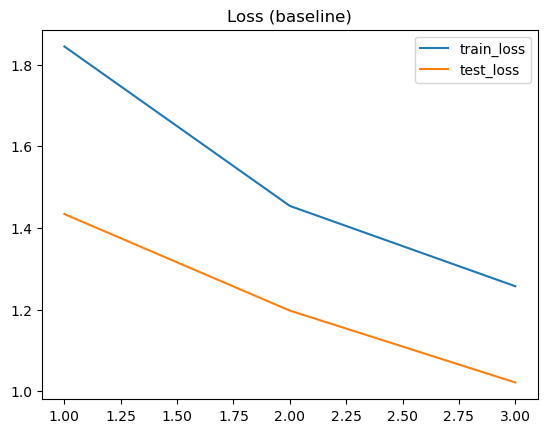

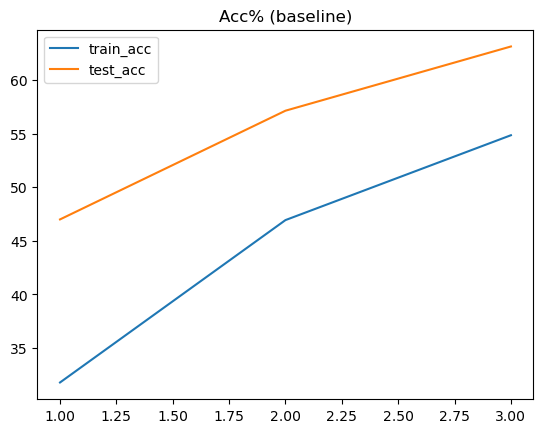

In [4]:
# Treinamento baseline (rápido por padrão)
model = SimpleConvNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)

EPOCHS = 3  # ajuste aqui
train_losses, train_accs, test_losses, test_accs = [], [], [], []

for epoch in range(1, EPOCHS+1):
    tr_loss, tr_acc = train_one_epoch(model, optimizer, train_loader, criterion)
    te_loss, te_acc, _, _ = evaluate(model, test_loader, criterion)
    train_losses.append(tr_loss); train_accs.append(tr_acc)
    test_losses.append(te_loss); test_accs.append(te_acc)
    print(f"Epoch {epoch}: train_loss={tr_loss:.4f}, train_acc={100*tr_acc:.2f}%, test_loss={te_loss:.4f}, test_acc={100*te_acc:.2f}%")

# Salva checkpoint baseline (apenas pesos)
os.makedirs("checkpoints", exist_ok=True)
baseline_path = "checkpoints/baseline.pth"
torch.save(model.state_dict(), baseline_path)
print("Baseline salvo em", baseline_path)

# Plots simples (opcional)
plt.figure(); plt.plot(range(1,len(train_losses)+1), train_losses, label="train_loss"); plt.plot(range(1,len(test_losses)+1), test_losses, label="test_loss"); plt.legend(); plt.title("Loss (baseline)"); plt.show()
plt.figure(); plt.plot(range(1,len(train_accs)+1), [100*x for x in train_accs], label="train_acc"); plt.plot(range(1,len(test_accs)+1), [100*x for x in test_accs], label="test_acc"); plt.legend(); plt.title("Acc% (baseline)"); plt.show()


### MLP (Multi-Layer Perceptron)

<img src="https://upload.wikimedia.org/wikipedia/commons/4/47/MultiLayerNeuralNetwork_english.png" width="333">
Fig 3. Exemplo de uma rede neural MLP com duas camadas. Extraído do original em [11].

In [5]:
# MLP
"""
input_dim=32*32*3: (imagens 32x32 com 3 canais RGB): 32*32*3 = 3072 neurônios na camada de entrada
hidden_dims=[512, 256]: 2 camadas ocultas de 512 e 256 neurônios
num_classes=10: classes (10 dígitos em CIFAR-10) : 10 neurônios na camada de saída
dropout=0.3: dropout para regularização = 30% neurônios desligados aleatórios
"""
class SimpleMLP(nn.Module):
    def __init__(self, input_dim=32*32*3, hidden_dims=[512, 256], num_classes=10, dropout=0.3):
        super().__init__()
        layers = []
        prev_dim = input_dim
        
        for hidden_dim in hidden_dims:
            layers.append(nn.Linear(prev_dim, hidden_dim))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout))
            prev_dim = hidden_dim
        
        layers.append(nn.Linear(prev_dim, num_classes))
        self.net = nn.Sequential(*layers)
    
    def forward(self, x):
        x = x.view(x.size(0), -1)  # flatten
        return self.net(x)

### Resultados com o MLP

Epoch 1: train_loss=1.9131, train_acc=30.16%, test_loss=1.6724, test_acc=40.44%
Epoch 2: train_loss=1.7584, train_acc=36.42%, test_loss=1.6202, test_acc=42.55%
Epoch 3: train_loss=1.6947, train_acc=38.94%, test_loss=1.5738, test_acc=44.26%
Baseline MLP salvo em checkpoints/baseline_mlp.pth


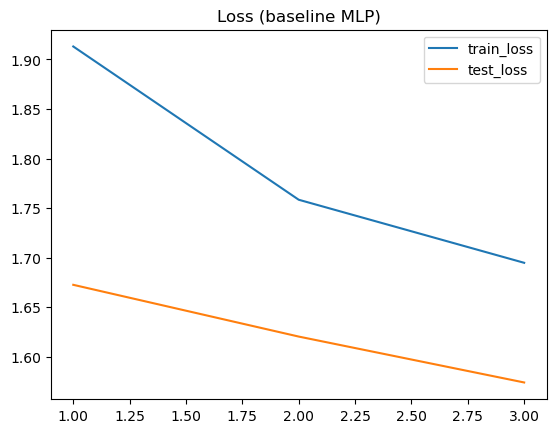

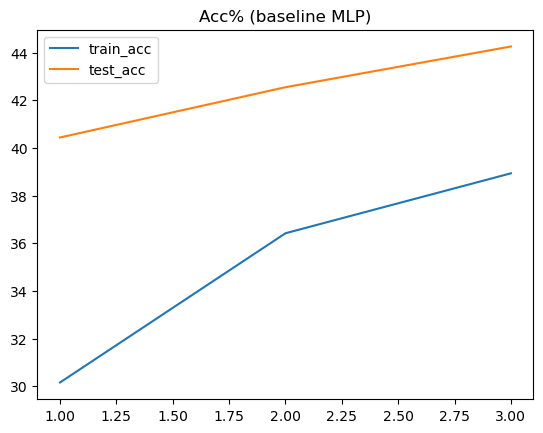

In [6]:
# Treinamento baseline MLP (rápido por padrão)
modelMLP = SimpleMLP().to(device)  #
criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(modelMLP.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)

EPOCHS = 3  # épocas no dataset
train_losses_mlp, train_accs_mlp, test_losses_mlp, test_accs_mlp = [], [], [], []

for epoch in range(1, EPOCHS+1):
    tr_loss, tr_acc = train_one_epoch(modelMLP, optimizer, train_loader, criterion)
    te_loss, te_acc, _, _ = evaluate(modelMLP, test_loader, criterion)
    train_losses_mlp.append(tr_loss); train_accs_mlp.append(tr_acc)
    test_losses_mlp.append(te_loss); test_accs_mlp.append(te_acc)
    print(f"Epoch {epoch}: train_loss={tr_loss:.4f}, train_acc={100*tr_acc:.2f}%, test_loss={te_loss:.4f}, test_acc={100*te_acc:.2f}%")

# Salva checkpoint baseline (apenas pesos)
os.makedirs("checkpoints", exist_ok=True)
baseline_path_MLP = "checkpoints/baseline_mlp.pth"  # ← Nome diferente para evitar conflito
torch.save(modelMLP.state_dict(), baseline_path_MLP)
print("Baseline MLP salvo em", baseline_path_MLP)

# Plots simples (opcional)
plt.figure(); plt.plot(range(1,len(train_losses_mlp)+1), train_losses_mlp, label="train_loss"); plt.plot(range(1,len(test_losses_mlp)+1), test_losses_mlp, label="test_loss"); plt.legend(); plt.title("Loss (baseline MLP)"); plt.show()
plt.figure(); plt.plot(range(1,len(train_accs_mlp)+1), [100*x for x in train_accs_mlp], label="train_acc"); plt.plot(range(1,len(test_accs_mlp)+1), [100*x for x in test_accs_mlp], label="test_acc"); plt.legend(); plt.title("Acc% (baseline MLP)"); plt.show()

---
## PARTE B: Differential Privacy

### Opacus

In [7]:
print("Device:", device)#exibe se CPU ou GPU

load_baseline = False  # Sem pesos = False, para o DP
baseline_path = "checkpoints/baseline.pth"#pesos da ConvNet
baseline_path_MLP = "checkpoints/baseline_mlp.pth"#pesos da MLP

# Criar novo modelo para DP
model_dp_cnn = SimpleConvNet().to(device)
if load_baseline and os.path.exists(baseline_path):
    sd = torch.load(baseline_path, map_location=device)
    model_dp.load_state_dict(sd)
    print("Pesos baseline-ConvNet carregados para inicializar modelo DP.")
model_dp = SimpleConvNet().to(device)#executa a ANN ConvNet
model_dp_mlp = SimpleMLP().to(device)#ANN MLP
if load_baseline and os.path.exists(baseline_path_MLP):
    sd = torch.load(baseline_path_MLP, map_location=device)
    model_dp_mlp.load_state_dict(sd)
    print("Pesos baseline-MLP carregados para inicializar modelo DP.")

#otimizador gradiente descendente   w = w - η * ∇L(w)
#Taxa de aprendizado: 0.01, Momentum: 0.9
optimizer_dp = optim.SGD(model_dp.parameters(), lr=0.01, momentum=0.9)#convnet
optimizer_dp_mlp = optim.SGD(model_dp_mlp.parameters(), lr=0.01, momentum=0.9)#mlp
#Função de Perda
criterion_dp = nn.CrossEntropyLoss()
criterion_dp_mlp = nn.CrossEntropyLoss()

# Verifica Opacus
try:
    import opacus
    from opacus import PrivacyEngine
    print("Opacus importado:", opacus.__version__)
except Exception as e:
    print("Opacus não está disponível ou falhou ao importar:", repr(e))
    raise RuntimeError("Opacus necessário para executar a Parte B (DP).")

Device: cpu
Opacus importado: 1.3.0


### Ajustes de parâmetros

In [8]:
# Configurações DP

#sample_rate = batch_size / tamanho_total_do_dataset
#Quanto maior o batch (dados por iteração), menos privacidade
batch_size_dp = 64

#Cria um loader de dados adaptado para DP. num_workers=0 desativa paralelismo para usar no DP
train_loader_dp = DataLoader(train_dataset, batch_size=batch_size_dp, shuffle=True, num_workers=0)

# API PrivacyEngine do Opacus
# Motor principal do Opacus que aplica DP.
privacy_engine = PrivacyEngine()

#Taxa de ruído adicionado
"""
Ruído gaussiano: N(0, (noise_multiplier × max_grad_norm)²)
Valores:
0.5-1.5: Baixa privacidade, boa acurácia
1.5-3.0: Média privacidade, acurácia moderada
>3.0: Alta privacidade, acurácia reduzida
"""
noise_multiplier = 1.1

#Limite máximo para a norma dos gradientes. Evita Outliers.
"""
gradiente_clipado = gradiente × min(1, max_grad_norm / ||gradiente||)
Valores: 0.5-2.0 (1.0 é padrão comum)
"""
max_grad_norm = 1.0

#ε (epsilon): "Orçamento de privacidade"
"""
ε < 1: Alta privacidade
ε = 1-10: Privacidade prática
ε > 10: Privacidade fraca
"""
target_epsilon = 3.0

#δ (delta): Probabilidade de falha. Sempre quase zero e nunca este valor
target_delta = 1e-5

#Número de passagens sobre todo o dataset.
"""
Em DP, usa-se pouco porque o número diminui privacidade
"""
epochs_dp = 3

C:\Users\Public\Anaconda3\Lib\site-packages\opacus\privacy_engine.py:142: UserWarning: Secure RNG turned off. This is perfectly fine for experimentation as it allows for much faster training performance, but remember to turn it on and retrain one last time before production with ``secure_mode`` turned on.
  warnings.warn(


### Invocação do DP

Usando PrivacyEngine.make_private_with_epsilon(...)


C:\Users\Public\Anaconda3\Lib\site-packages\opacus\accountants\analysis\rdp.py:332: UserWarning: Optimal order is the largest alpha. Please consider expanding the range of alphas to get a tighter privacy bound.
  warnings.warn(
C:\Users\Public\Anaconda3\Lib\site-packages\opacus\accountants\analysis\prv\prvs.py:50: RuntimeWarning: invalid value encountered in log
  z = np.log((np.exp(t) + q - 1) / q)


Privacy engine ativo. Iniciando treino DP (epocas: 3 )


C:\Users\Public\Anaconda3\Lib\site-packages\torch\nn\modules\module.py:1866: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)


Epoch 1: train_loss=2.1126, train_acc=23.07%, test_loss=1.9170, test_acc=31.37%, epsilon=2.43
Epoch 2: train_loss=1.9628, train_acc=30.28%, test_loss=1.8210, test_acc=35.21%, epsilon=2.77
Epoch 3: train_loss=1.9055, train_acc=33.01%, test_loss=1.7436, test_acc=38.93%, epsilon=3.00
Modelo DP salvo em checkpoints/dp_model.pth
Epoch 1: train_loss=2.1423, train_acc=21.47%, test_loss=1.9678, test_acc=29.10%, epsilon=3.00
Epoch 2: train_loss=2.1419, train_acc=24.41%, test_loss=1.9567, test_acc=31.03%, epsilon=3.00
Epoch 3: train_loss=2.1970, train_acc=25.05%, test_loss=1.9907, test_acc=32.57%, epsilon=3.00
Modelo DP salvo em checkpoints/dp_model_mlp.pth


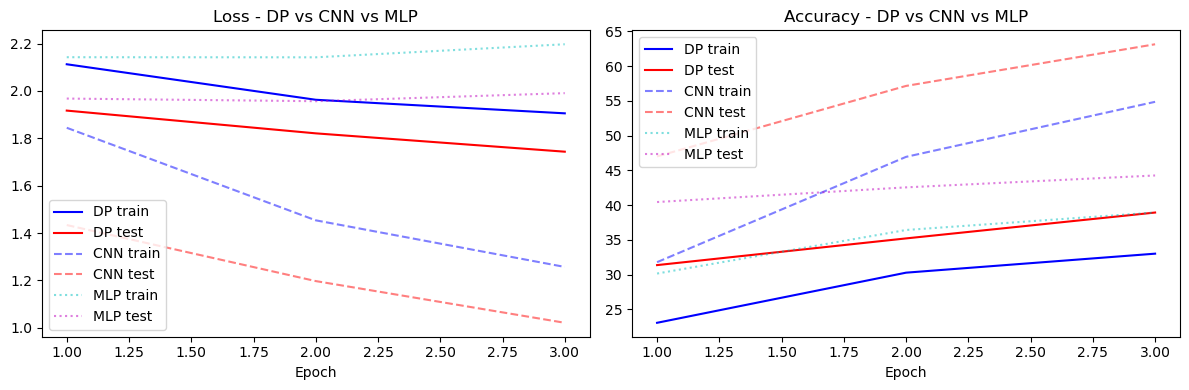


=== RELATÓRIO FINAL ===
CNN - Melhor acurácia: 63.13%
MLP - Melhor acurácia: 44.26%
DP - Melhor acurácia: 38.93%
Privacidade final: ε = 3.49, δ = 1e-05


In [9]:
# Tenta usar make_private_with_epsilon -> make_private -> attach com sample_rate, na ordem
success = False
try:
    # API: make_private_with_epsilon (aponta versão mais nova)
    if hasattr(privacy_engine, "make_private_with_epsilon"):
        print("Usando PrivacyEngine.make_private_with_epsilon(...)")
        model_dp, optimizer_dp, train_loader_dp = privacy_engine.make_private_with_epsilon(
            module=model_dp,
            optimizer=optimizer_dp,
            data_loader=train_loader_dp,
            target_epsilon=target_epsilon,
            target_delta=target_delta,
            epochs=epochs_dp,
            max_grad_norm=max_grad_norm,
        )
        model_dp_mlp, optimizer_dp_mlp, train_loader_dp_mlp = privacy_engine.make_private_with_epsilon(
            module=model_dp_mlp,
            optimizer=optimizer_dp_mlp,
            data_loader=train_loader_dp,
            target_epsilon=target_epsilon,
            target_delta=target_delta,
            epochs=epochs_dp,
            max_grad_norm=max_grad_norm,
        )
        success = True
except Exception as e:
    print("make_private_with_epsilon falhou:", repr(e))

"""
if not success:
    try:
        # API: make_private (mais comum)
        if hasattr(privacy_engine, "make_private"):
            print("Tentando PrivacyEngine.make_private(...)")
            model_dp, optimizer_dp, train_loader_dp = privacy_engine.make_private(
                module=model_dp,
                optimizer=optimizer_dp,
                data_loader=train_loader_dp,
                noise_multiplier=noise_multiplier,
                max_grad_norm=max_grad_norm,
            )
            success = True
    except Exception as e:
        print("make_private falhou:", repr(e))

if not success:
    try:
        # API alternativa: attach
        print("Tentando PrivacyEngine.attach(...)")
        # Para attach algumas versões exigem sample_rate e sample_size - calculamos:
        sample_rate = batch_size_dp / float(len(train_dataset))
        privacy_engine = PrivacyEngine(
            model_dp,
            sample_rate=sample_rate,
            alphas=[10, 100],
            noise_multiplier=noise_multiplier,
            max_grad_norm=max_grad_norm,
        )
        privacy_engine.attach(optimizer_dp)
        success = True
    except Exception as e:
        print("attach falhou:", repr(e))
"""
        
if not success:
    print("\API do Opacus funcionou automaticamente neste ambiente.")
    raise RuntimeError("Opacus API incompatível - Parte DP abortada sem afetar baseline.")

# Se chegamos até aqui, Opacus foi ligado e train_loader_dp é o loader que o engine retornou
print("Privacy engine ativo. Iniciando treino DP (epocas:", epochs_dp, ")")

# Função de treino adaptada para DP
def train_one_epoch_dp(model, optimizer, loader, criterion):
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    
    for images, labels in loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * images.size(0)
        _, preds = outputs.max(1)
        total += labels.size(0)
        correct += preds.eq(labels).sum().item()
    
    return running_loss / total, correct / total

###LOOP 1

# Loop de treino DP (do baseline CNN)
train_losses_dp = []
train_accs_dp = []
test_losses_dp = []
test_accs_dp = []

for epoch in range(1, epochs_dp + 1):
    tr_loss, tr_acc = train_one_epoch_dp(model_dp, optimizer_dp, train_loader_dp, criterion_dp)
    te_loss, te_acc, _, _ = evaluate(model_dp, test_loader, criterion_dp)
    
    train_losses_dp.append(tr_loss)
    train_accs_dp.append(tr_acc)
    test_losses_dp.append(te_loss)
    test_accs_dp.append(te_acc)
    
    # Obter epsilon atual
    if hasattr(privacy_engine, 'get_epsilon'):
        epsilon = privacy_engine.get_epsilon(target_delta)
    else:
        epsilon = target_epsilon  # fallback
    
    print(f"Epoch {epoch}: train_loss={tr_loss:.4f}, train_acc={100*tr_acc:.2f}%, "
          f"test_loss={te_loss:.4f}, test_acc={100*te_acc:.2f}%, epsilon={epsilon:.2f}")

# Salvar modelo DP
dp_path = "checkpoints/dp_model.pth"
torch.save(model_dp.state_dict(), dp_path)
print(f"Modelo DP salvo em {dp_path}")

###LOOP 2

# Loop de treino DP (do baseline MLP)
train_losses_dp_mlp = []
train_accs_dp_mlp = []
test_losses_dp_mlp = []
test_accs_dp_mlp = []

for epoch in range(1, epochs_dp + 1):
    tr_loss, tr_acc = train_one_epoch_dp(model_dp_mlp, optimizer_dp_mlp, train_loader_dp_mlp, criterion_dp_mlp)
    te_loss, te_acc, _, _ = evaluate(model_dp_mlp, test_loader, criterion_dp_mlp)
    
    train_losses_dp_mlp.append(tr_loss)
    train_accs_dp_mlp.append(tr_acc)
    test_losses_dp_mlp.append(te_loss)
    test_accs_dp_mlp.append(te_acc)
    
    # Obter epsilon atual
    if hasattr(privacy_engine, 'get_epsilon'):
        epsilon_mlp = privacy_engine.get_epsilon(target_delta)
    else:
        epsilon_mlp = target_epsilon  # fallback
    
    print(f"Epoch {epoch}: train_loss={tr_loss:.4f}, train_acc={100*tr_acc:.2f}%, "
          f"test_loss={te_loss:.4f}, test_acc={100*te_acc:.2f}%, epsilon={epsilon:.2f}")

# Salvar modelo DP
dp_path_mlp = "checkpoints/dp_model_mlp.pth"
torch.save(model_dp_mlp.state_dict(), dp_path_mlp)
print(f"Modelo DP salvo em {dp_path_mlp}")

###

# Plots comparativos
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_losses_dp)+1), train_losses_dp, 'b-', label='DP train')
plt.plot(range(1, len(test_losses_dp)+1), test_losses_dp, 'r-', label='DP test')
if len(train_losses) > 0:  # Se baseline foi treinado
    plt.plot(range(1, len(train_losses)+1), train_losses, 'b--', alpha=0.5, label='CNN train')
    plt.plot(range(1, len(test_losses)+1), test_losses, 'r--', alpha=0.5, label='CNN test')
    plt.plot(range(1, len(train_losses_dp_mlp)+1), train_losses_dp_mlp, 'c:', alpha=0.5, label='MLP train')
    plt.plot(range(1, len(test_losses_dp_mlp)+1), test_losses_dp_mlp, 'm:', alpha=0.5, label='MLP test')
plt.legend()
plt.title("Loss - DP vs CNN vs MLP")
plt.xlabel("Epoch")

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_accs_dp)+1), [100*x for x in train_accs_dp], 'b-', label='DP train')
plt.plot(range(1, len(test_accs_dp)+1), [100*x for x in test_accs_dp], 'r-', label='DP test')
if len(train_accs) > 0:  # Se >0, baseline foi treinado
    plt.plot(range(1, len(train_accs)+1), [100*x for x in train_accs], 'b--', alpha=0.5, label='CNN train')
    plt.plot(range(1, len(test_accs)+1), [100*x for x in test_accs], 'r--', alpha=0.5, label='CNN test')
    plt.plot(range(1, len(train_accs_mlp)+1), [100*x for x in train_accs_mlp], 'c:', alpha=0.5, label='MLP train')
    plt.plot(range(1, len(test_accs_mlp)+1), [100*x for x in test_accs_mlp], 'm:', alpha=0.5, label='MLP test')
plt.legend()
plt.title("Accuracy - DP vs CNN vs MLP")
plt.xlabel("Epoch")

plt.tight_layout()
plt.show()

# Relatório final
print("\n=== RELATÓRIO FINAL ===")
if len(test_accs) > 0:
    print(f"CNN - Melhor acurácia: {100*max(test_accs):.2f}%")
if len(test_accs_mlp) > 0:
    print(f"MLP - Melhor acurácia: {100*max(test_accs_mlp):.2f}%")
print(f"DP - Melhor acurácia: {100*max(test_accs_dp):.2f}%")

if hasattr(privacy_engine, 'get_epsilon'):
    final_epsilon = privacy_engine.get_epsilon(target_delta)
    print(f"Privacidade final: ε = {final_epsilon:.2f}, δ = {target_delta}")
else:
    print(f"Privacidade alvo: ε = {target_epsilon:.2f}, δ = {target_delta}")